
**What is a vibe?**


> Merriam-Webster defines a vibe as *“…a distinctive feeling or quality capable of being sensed…”*

>Our definition of vibe is *“a weighted average of parameters pertaining to a particular audio sample that is indicative of the emotion prevalent in the given sample”*


# 1. Import statements

In [855]:
!pip install spotipy
!pip install seaborn
!pip install plotly


In [856]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
import seaborn as sns
import spotipy
import json
import time
import tensorflow as tf

In [857]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from spotipy.oauth2 import SpotifyClientCredentials
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import plotly.graph_objs as go
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
import plotly.graph_objs as go
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [858]:
def RMSE(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [859]:
tf.compat.v1.disable_eager_execution() # We do not require debugging/additional UI components. However, we do require graph flow (as opposed to Python Flow)
tf.compat.v1.disable_v2_behavior() # We call this function to disable 2.x behavior during exections.

In [860]:
pd.set_option('display.max_colwidth',1000)
git_dataset = r'https://raw.githubusercontent.com/divyanshsr/SpotifyDataset/main/data.csv'
df = pd.read_csv (git_dataset)
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# Understanding the Dataset

Our Spotify dataset consists of 17 columns and 2017 rows, and each column is a specific parameter linked to every song. 

In [861]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [862]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0  ...            artist
0              0  ...            Future
1              1  ...  Childish Gambino
2              2  ...            Future
3              3  ...       Beach House
4              4  ...       Junior Boys
...          ...  ...               ...
2012        2012  ...    Kill The Noise
2013        2013  ...    Dillon Francis
2014        2014  ...          Rain Man
2015        2015  ...        Twin Moons
2016        2016  ...         Bleachers

[2017 rows x 17 columns]>

In [863]:
df.dtypes

Unnamed: 0            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
target                int64
song_title           object
artist               object
dtype: object

We see that we have no NaN values, and hence we can continue.

In [864]:
df.isnull().values.any()

False

# Importing the playlist from Spotify

Here, we are using the spotipy library to connect to the public Spotify API to scrape each song in a Spotify playlist.



We are gathering this information and fitting it into a dataframe (df1).

In [865]:
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 
cid ="68dcc575a36e4d1f88cdb2ad8d1ea8de" 
secret = "6dd856ccdc054684931414a351995686" 
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
sp.trace=False 
playlist = sp.user_playlist("68dcc575a36e4d1f88cdb2ad8d1ea8de", "1EwZS6fycob0MS7xCOh8cb") 
songs = playlist["tracks"]["items"] 
ids = [] 
for i in range(len(songs)): 
    ids.append(songs[i]["track"]["id"]) 
features = sp.audio_features(ids) 
df1 = pd.DataFrame(features)

Here, we see that we have fit the playlist data into a dataframe.

In [866]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      37 non-null     float64
 1   energy            37 non-null     float64
 2   key               37 non-null     int64  
 3   loudness          37 non-null     float64
 4   mode              37 non-null     int64  
 5   speechiness       37 non-null     float64
 6   acousticness      37 non-null     float64
 7   instrumentalness  37 non-null     float64
 8   liveness          37 non-null     float64
 9   valence           37 non-null     float64
 10  tempo             37 non-null     float64
 11  type              37 non-null     object 
 12  id                37 non-null     object 
 13  uri               37 non-null     object 
 14  track_href        37 non-null     object 
 15  analysis_url      37 non-null     object 
 16  duration_ms       37 non-null     int64  
 17 

In [867]:
#df1.sort_values(by='tempo', ascending=False).head()

This is to download the playlist's csv file using Google colab's libraries


In [868]:
#df1.to_csv('df.csv')
#files.download('df.csv')


#This is to download the playlist's csv file using Google colab's libraries


In [869]:
df1.sort_values(by='tempo', ascending=False).head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
1,0.109,0.952,0,-4.885,0,0.1230,0.001440,0.009220,0.3450,0.137,199.952,audio_features,2hSmv6Dx5L55TwddgzdLBu,spotify:track:2hSmv6Dx5L55TwddgzdLBu,https://api.spotify.com/v1/tracks/2hSmv6Dx5L55TwddgzdLBu,https://api.spotify.com/v1/audio-analysis/2hSmv6Dx5L55TwddgzdLBu,439213,4
4,0.140,0.954,11,-6.323,0,0.1290,0.000057,0.001810,0.0729,0.142,199.947,audio_features,1wVMkGi3vQlLSpO04RKzgm,spotify:track:1wVMkGi3vQlLSpO04RKzgm,https://api.spotify.com/v1/tracks/1wVMkGi3vQlLSpO04RKzgm,https://api.spotify.com/v1/audio-analysis/1wVMkGi3vQlLSpO04RKzgm,587133,4
24,0.138,0.985,2,-4.124,1,0.1600,0.000104,0.000426,0.4000,0.307,199.920,audio_features,1jRAGGU66WrbxIgkeIxf5H,spotify:track:1jRAGGU66WrbxIgkeIxf5H,https://api.spotify.com/v1/tracks/1jRAGGU66WrbxIgkeIxf5H,https://api.spotify.com/v1/audio-analysis/1jRAGGU66WrbxIgkeIxf5H,433800,4
15,0.216,0.903,4,-5.066,0,0.0839,0.000040,0.245000,0.3560,0.210,199.864,audio_features,3qmaOg7scKHIP5NWnPGoCr,spotify:track:3qmaOg7scKHIP5NWnPGoCr,https://api.spotify.com/v1/tracks/3qmaOg7scKHIP5NWnPGoCr,https://api.spotify.com/v1/audio-analysis/3qmaOg7scKHIP5NWnPGoCr,406827,4
17,0.345,0.986,7,-3.453,0,0.1990,0.000134,0.000006,0.1940,0.225,179.903,audio_features,6FuvavdApbDC1pG5jldehp,spotify:track:6FuvavdApbDC1pG5jldehp,https://api.spotify.com/v1/tracks/6FuvavdApbDC1pG5jldehp,https://api.spotify.com/v1/audio-analysis/6FuvavdApbDC1pG5jldehp,273520,4


# Dataset Manipulation

Let's find the fastest song in our playlist.

This prints out a url of the fastest *(according to BPM)* song in the playlist by identifying the correlating URI with maximum tempo.

In [870]:
x=df1['tempo'].max()
spot_str="https://open.spotify.com/track/"
sub_str=df1.loc[df1['tempo'] == x, 'id']
spot_str+=sub_str
spot_str

1    https://open.spotify.com/track/2hSmv6Dx5L55TwddgzdLBu
Name: id, dtype: object

Let's find the fastest song in our Spotify Dataset.

This prints out the name and artist of the fastest (according to BPM) song in the playlist by identifying the correlating song name/artist with maximum tempo.

In [871]:
x=df['tempo'].max()
#spot_str="https://open.spotify.com/track/"
sub_str=df.loc[df['tempo'] == x, 'song_title']
song_art=df.loc[df['tempo'] == x, 'artist']
x=str(x)
print(sub_str+" by "+song_art+" has a tempo of "+x+" BPM")

412    Lazuli by Beach House has a tempo of 219.331 BPM
dtype: object


In [872]:
df1.shape

(37, 18)

In [873]:
df1.max()

danceability                                                                   0.638
energy                                                                         0.995
key                                                                               11
loudness                                                                       -2.53
mode                                                                               1
speechiness                                                                    0.267
acousticness                                                                   0.136
instrumentalness                                                               0.828
liveness                                                                       0.951
valence                                                                        0.723
tempo                                                                        199.952
type                                                             

In [874]:
df1['valence'].max() 

0.723

In [875]:
df[["loudness", "tempo"]].corr()

,loudness,tempo
loudness,1.000000,0.156418
tempo,0.156418,1.000000


# *Fitting the data between the two datasets*

In [876]:
df.shape


(2017, 17)

In [877]:
df1.shape


(37, 18)

In [878]:
list1=list(df)
list2=list(df1)

In [879]:
list1

['Unnamed: 0',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'target',
 'song_title',
 'artist']

In [880]:
list2

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [881]:
common_list=list(set(list1).intersection(list2))
common_list

['duration_ms',
 'valence',
 'speechiness',
 'liveness',
 'instrumentalness',
 'key',
 'energy',
 'time_signature',
 'mode',
 'tempo',
 'acousticness',
 'danceability',
 'loudness']

In [882]:
df_common=df[common_list]
df1_common=df1[common_list]


In [883]:
frames = [df_common, df1_common]
common_df=pd.concat(frames)
common_df.shape

(2054, 13)

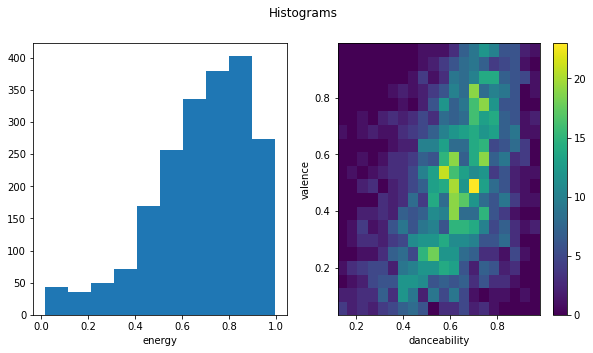

In [884]:
x = "danceability"
y = "valence"
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(df[x], df[y], bins=20)
ax1.hist(df["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()

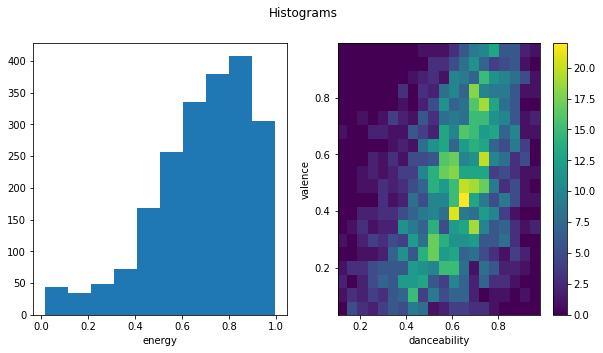

In [885]:
x = "danceability"
y = "valence"
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(common_df[x], common_df[y], bins=20)
ax1.hist(common_df["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()

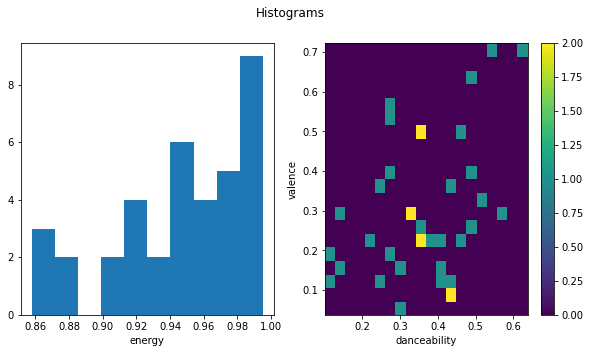

In [886]:
x = "danceability"
y = "valence"
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(df1[x], df1[y], bins=20)
ax1.hist(df1["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()



# Visualization 

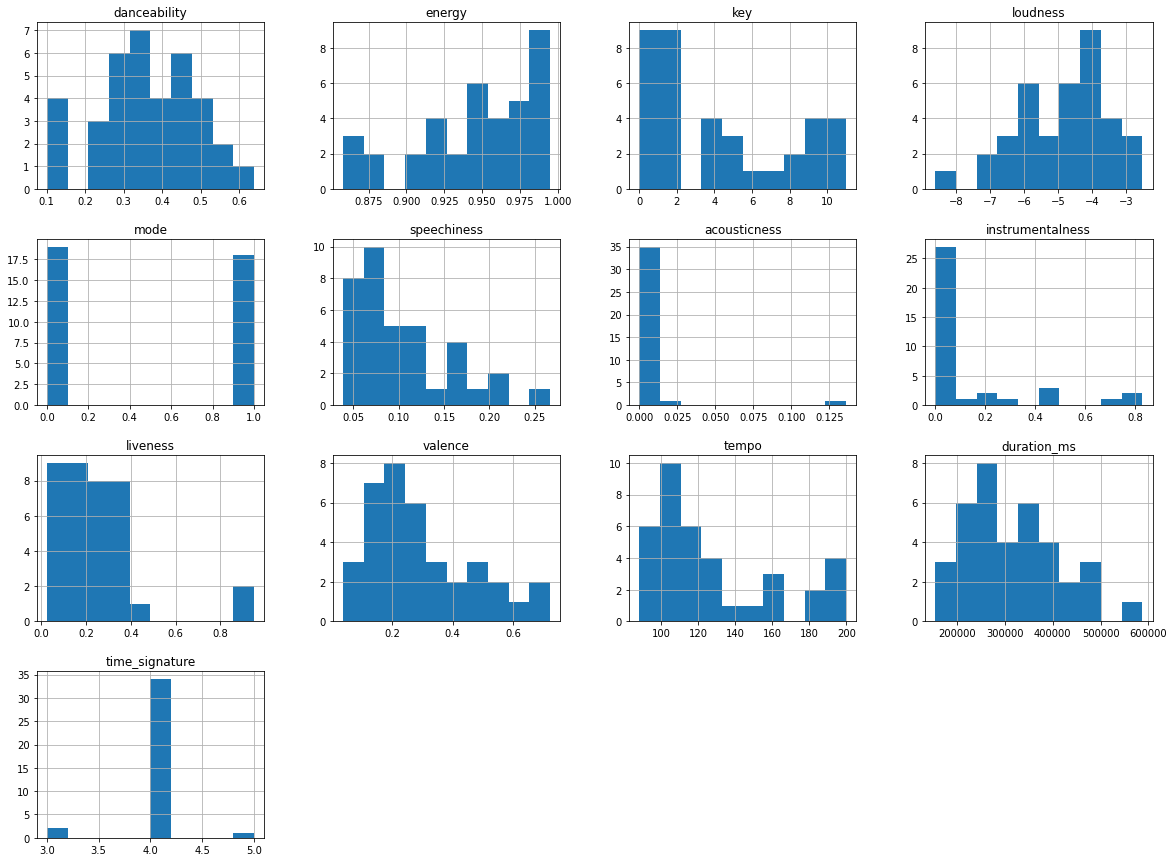

In [887]:
df1.hist(bins=10, figsize=(20,15))
plt.show()

(0.0, 227.9046)

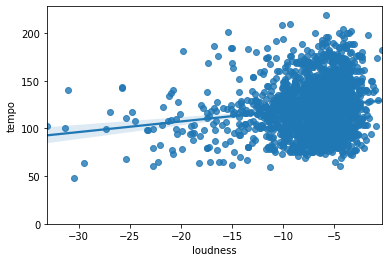

In [888]:
sns.regplot(x="loudness", y="tempo", data=df)
plt.ylim(0,)

In [889]:
df_h=df[['loudness','tempo','valence','energy','danceability','duration_ms']]

In [890]:
df_group_h=df_h.groupby(['valence','danceability'],as_index=False)

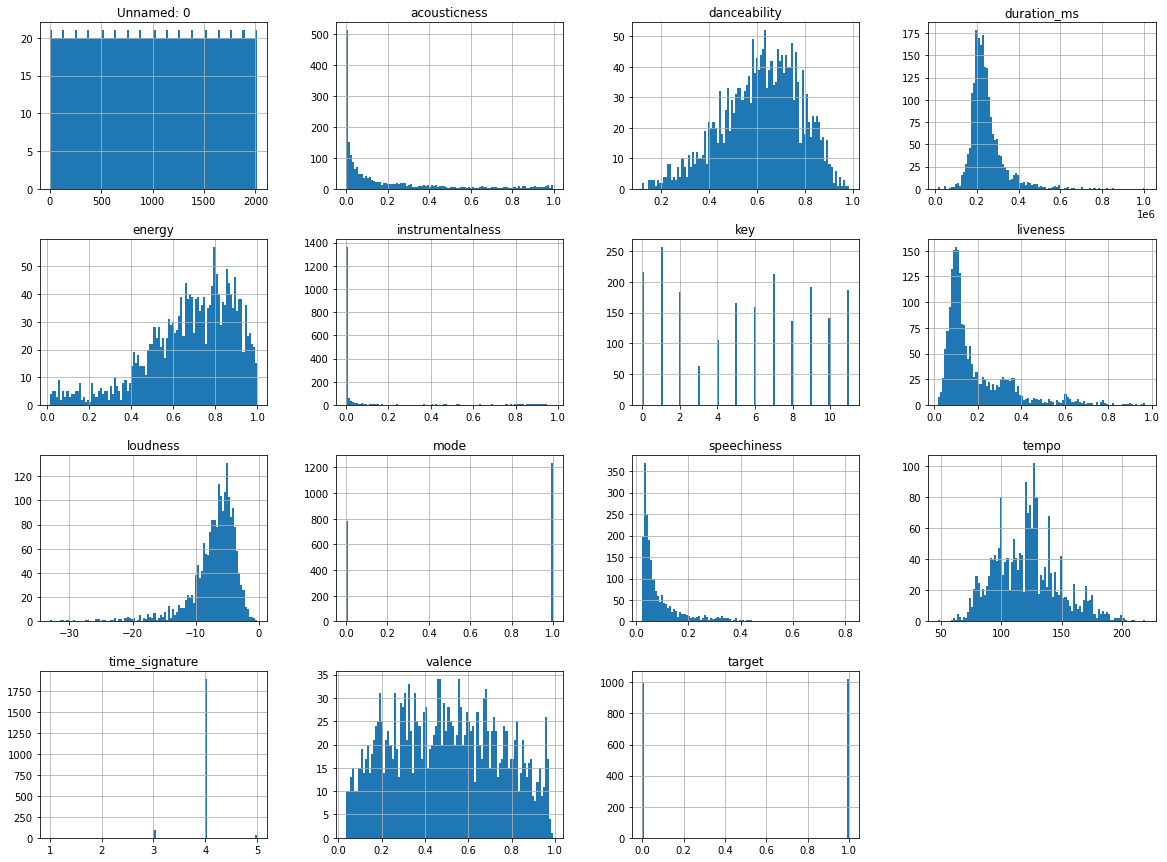

In [891]:
df.hist(bins=100, figsize=(20,15))
plt.show()

In [892]:

df = df[['song_title','artist','duration_ms','tempo','danceability','energy','valence','loudness']]

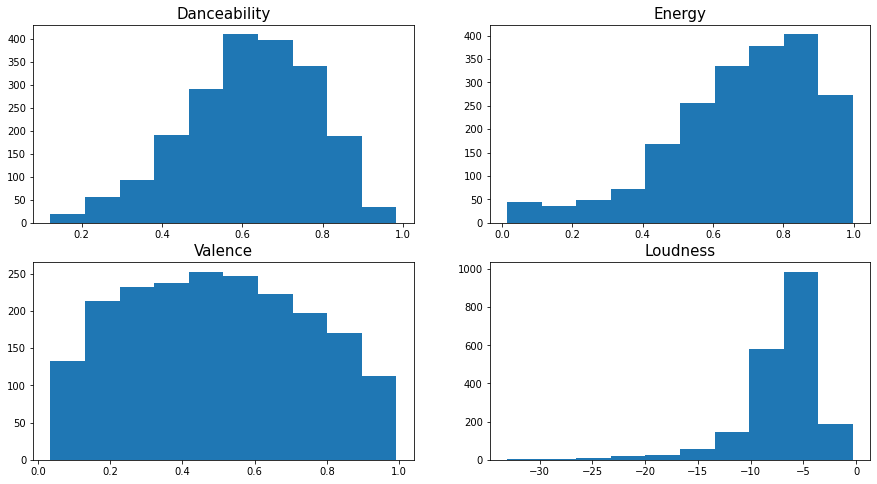

In [893]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [894]:

df.describe()

,duration_ms,tempo,danceability,energy,valence,loudness
count,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,2.463062e+05,121.603272,0.618422,0.681577,0.496815,-7.085624
std,8.198181e+04,26.685604,0.161029,0.210273,0.247195,3.761684
min,1.604200e+04,47.859000,0.122000,0.014800,0.034800,-33.097000
25%,2.000150e+05,100.189000,0.514000,0.563000,0.295000,-8.394000
50%,2.292610e+05,121.427000,0.631000,0.715000,0.492000,-6.248000
75%,2.703330e+05,137.849000,0.738000,0.846000,0.691000,-4.746000
max,1.004627e+06,219.331000,0.984000,0.998000,0.992000,-0.307000


In [895]:

col_features = df.columns[6:]
X = MinMaxScaler().fit_transform(df[col_features])

In [896]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

In [897]:
df['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

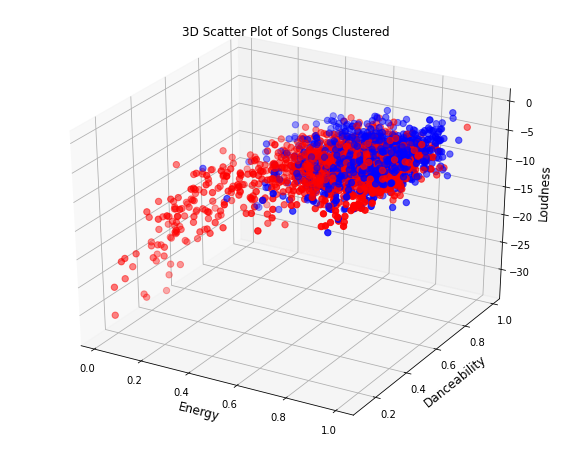

In [898]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

In [899]:
df.groupby(['kmeans']).mean()

,duration_ms,tempo,danceability,energy,valence,loudness
kmeans,,,,,,
0,238799.176892,121.046921,0.674840,0.736559,0.713035,-6.417067
1,253372.478345,122.126959,0.565316,0.629823,0.293290,-7.714930


In [900]:
url= 'https://raw.githubusercontent.com/cristobalvch/Spotify-Machine-Learning/master/data/data_moods.csv'
df4 = pd.read_csv(url)
df4.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [901]:
col_features = df4.columns[6:-3]
X= MinMaxScaler().fit_transform(df4[col_features])
X2 = np.array(df4[col_features])
Y = df4['mood']

In [902]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)


#Convert to  dummy (Not necessary in my case)
dummy_y = np_utils.to_categorical(encoded_y)

X_train,X_test,Y_train,Y_test = train_test_split(X,encoded_y,test_size=0.2,random_state=15)

target = pd.DataFrame({'mood':df4['mood'].tolist(),'encode':encoded_y}).drop_duplicates().sort_values(['encode'],ascending=True)
target

,mood,encode
5,Calm,0
4,Energetic,1
0,Happy,2
1,Sad,3


In [903]:
def base_model():
    #Create the model
    model = Sequential()
    #Add 1 layer with 8 nodes,input of 4 dim with relu function
    model.add(Dense(8,input_dim=10,activation='relu'))
    #Add 1 layer with output 3 and softmax function
    model.add(Dense(4,activation='softmax'))
    #Compile the model using sigmoid loss function and adam optim
    model.compile(loss='categorical_crossentropy',optimizer='adam',
                 metrics=['accuracy'])
    return model

In [904]:
estimator = KerasClassifier(build_fn=base_model,epochs=300,batch_size=200,verbose=0)

In [905]:
kfold = KFold(n_splits=10,shuffle=True)
results = cross_val_score(estimator,X,encoded_y,cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100,results.std()*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



Baseline: 79.31% (6.11%)


In [906]:
estimator.fit(X_train,Y_train)
y_preds = estimator.predict(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning:

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



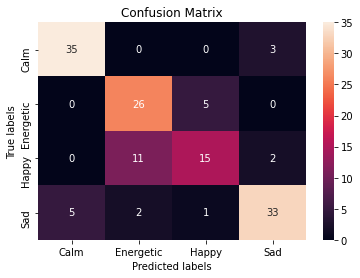

Accuracy Score 0.7898550724637681


In [907]:
cm = confusion_matrix(Y_test,y_preds)
ax = plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

labels = target['mood']
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()

print("Accuracy Score",accuracy_score(Y_test,y_preds))

In [908]:
def get_songs_features(ids):

    meta = sp.track(ids)
    features = sp.audio_features(ids)

In [909]:
def predict_mood(id_song):
    #Join the model and the scaler in a Pipeline
    pip = Pipeline([('minmaxscaler',MinMaxScaler()),('keras',KerasClassifier(build_fn=base_model,epochs=300,
                                                                             batch_size=200,verbose=0))])
    #Fit the Pipeline
    pip.fit(X2,encoded_y)

    #Obtain the features of the song
    preds = get_songs_features(id_song)
    #Pre-process the features to input the Model
    preds_features = np.array(preds[0][6:-2]).reshape(-1,1).T

    #Predict the features of the song
    results = pip.predict(preds_features)

    mood = np.array(target['mood'][target['encode']==int(results)])
    name_song = preds[0][0]
    artist = preds[0][2]

    return print("{0} by {1} is a {2} song".format(name_song,artist,mood[0].upper()))
    #print(f"{name_song} by {artist} is a {mood[0].upper()} song")

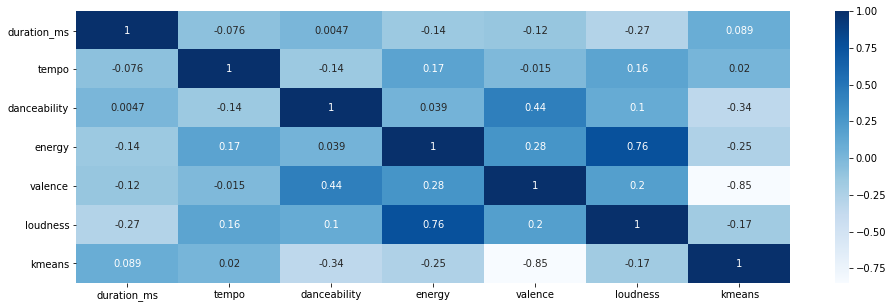

In [910]:
corrs = df.corr()
plt.figure(figsize = (16,5))
ax = sns.heatmap(corrs,cmap='Blues',annot=True)

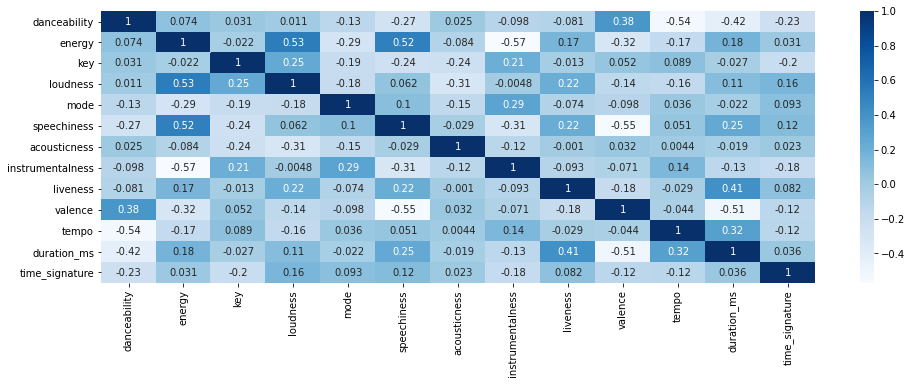

In [911]:
corrs = df1.corr()
plt.figure(figsize = (16,5))
ax = sns.heatmap(corrs,cmap='Blues',annot=True)

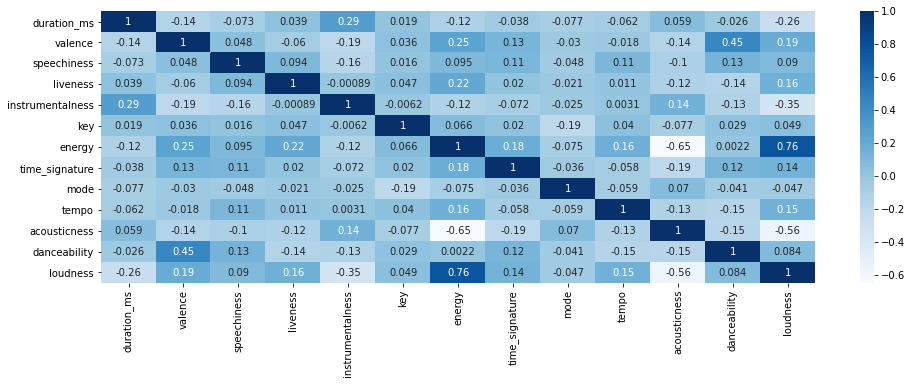

In [912]:
corrs = common_df.corr()
plt.figure(figsize = (16,5))
ax = sns.heatmap(corrs,cmap='Blues',annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

No handles with labels found to put in legend.


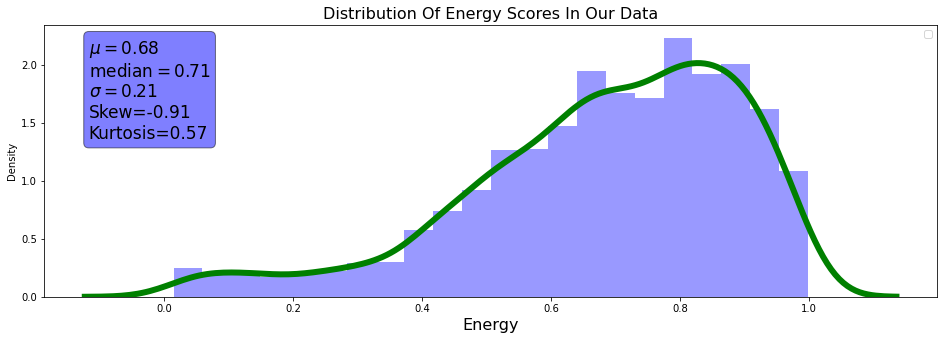

In [913]:
plt.figure(figsize = (16,5))
ax = sns.distplot(df['energy'],hist_kws={'color':'b'},kde_kws={'color':'g','lw':'6'})
textstr = '\n'.join(
    
        (   r'$\mu=%.2f$' % (df['energy'].mean(),)
          , r'$\mathrm{median}=%.2f$' % (df['energy'].median(),)
          , r'$\sigma=%.2f$' % (df['energy'].std(),)
          , r'Skew=%.2f' % (df['energy'].skew(),)
          , r'Kurtosis=%.2f' % (df['energy'].kurt(),)

        )
    
                  )

props = dict(boxstyle='round', facecolor='blue', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=17,
        verticalalignment='top', bbox=props)
ax.set_title('Distribution Of Energy Scores In Our Data',fontsize=16)
ax.set_xlabel('Energy',fontsize=16)
plt.legend()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

No handles with labels found to put in legend.


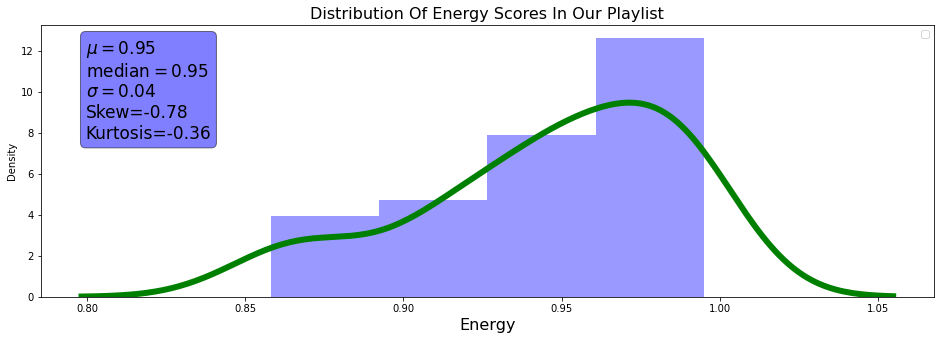

In [914]:
plt.figure(figsize = (16,5))
ax = sns.distplot(df1['energy'],hist_kws={'color':'b'},kde_kws={'color':'g','lw':'6'})
textstr = '\n'.join(
    
        (   r'$\mu=%.2f$' % (df1['energy'].mean(),)
          , r'$\mathrm{median}=%.2f$' % (df1['energy'].median(),)
          , r'$\sigma=%.2f$' % (df1['energy'].std(),)
          , r'Skew=%.2f' % (df1['energy'].skew(),)
          , r'Kurtosis=%.2f' % (df1['energy'].kurt(),)

        )
    
                  )

props = dict(boxstyle='round', facecolor='blue', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=17,
        verticalalignment='top', bbox=props)
ax.set_title('Distribution Of Energy Scores In Our Playlist',fontsize=16)
ax.set_xlabel('Energy',fontsize=16)
plt.legend()

In [915]:

ex.scatter_polar(df,theta='loudness',r='energy',color ='valence',title='Spread of different song danceability according to beats per minute')

# Predicting the energy levels of each song in the dataset
Model Selection, fitting and prediction.

Let us select a model to predict the energy of a song. As our data set is very small, it is crucial for us to use cross validation to (hopefully) avoiding overfitting.


In [916]:
y = df['energy']
my_list = list(df)
X=df[my_list]
X=X.drop(['energy','song_title','artist'], axis = 1) 
X

,duration_ms,tempo,danceability,valence,loudness,kmeans
0,204600,150.062,0.833,0.286,-8.795,1
1,326933,160.083,0.743,0.588,-10.401,0
2,185707,75.044,0.838,0.173,-7.148,1
3,199413,86.468,0.494,0.230,-15.236,1
4,392893,174.004,0.678,0.904,-11.648,0
...,...,...,...,...,...,...
2012,274404,74.976,0.584,0.211,-3.501,1
2013,182182,110.041,0.894,0.867,-2.663,0
2014,207200,150.082,0.637,0.470,-2.467,1
2015,185600,150.011,0.557,0.623,-2.735,0


In [917]:

LR_pipe = Pipeline(steps=[('scaler',StandardScaler()),('poly',PolynomialFeatures(degree=1)),('LinearRegression',LinearRegression())])

LR_scores = -1*cross_val_score(LR_pipe,X,y,cv=5,scoring='neg_mean_squared_error')

print('Linear Regression Cross Validation Average MSE: ',LR_scores.mean())

Linear Regression Cross Validation Average MSE:  0.017347996996334505


In [918]:
LR_pipe.fit(X,y)
pred = LR_pipe.predict(X)
mse = mean_squared_error(pred,y)
print('Linear Regression Fitted Using All The Data MSE: ',mse )

Linear Regression Fitted Using All The Data MSE:  0.016936547739262533


In [919]:
tr = go.Scatter(x = np.arange(1,len(LR_scores)+1),y=LR_scores,mode='lines')
fig = go.Figure(data=[tr],layout={'title':'Linear Regression Fold MSE Scores','xaxis_title':'Fold Number','yaxis_title':'MSE'})
fig.show()

In [920]:
DT_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',DecisionTreeRegressor(max_leaf_nodes=10))])
DT_scores = -1*cross_val_score(DT_Pipe,X,y,cv=5,scoring='neg_mean_squared_error')
DT_Pipe.fit(X,y)
print('Decision Tree MSE: ',DT_scores.mean())

Decision Tree MSE:  0.020087594504384347


In [921]:
tr = go.Scatter(x = np.arange(1,len(DT_scores)+1),y=DT_scores,mode='lines')
fig = go.Figure(data=[tr],layout={'title':'Decision Tree Fold MSE Scores','xaxis_title':'Fold Number','yaxis_title':'MSE'})
fig.show()

In [922]:
RF_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',RandomForestRegressor(max_leaf_nodes=14,n_estimators=20,random_state=42))])
RF_scores = -1*cross_val_score(RF_Pipe,X,y,cv=5,scoring='neg_mean_squared_error')
RF_Pipe.fit(X,y)
print('RandomForest MSE: ',RF_scores.mean())

RandomForest MSE:  0.01797334469499095


In [923]:
tr = go.Scatter(x = np.arange(1,len(RF_scores)+1),y=RF_scores,mode='lines')
fig = go.Figure(data=[tr],layout={'title':'Random Forest Fold MSE Scores','xaxis_title':'Fold Number','yaxis_title':'MSE'})
fig.show()

In [924]:
Knn_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',KNeighborsRegressor(n_neighbors=5))])
Knn_scores = -1*cross_val_score(Knn_Pipe,X,y,cv=5,scoring='neg_mean_squared_error')
Knn_Pipe.fit(X,y)
print('Knn MSE: ',Knn_scores.mean())

Knn MSE:  0.020562992003113283


In [925]:
tr = go.Scatter(x = np.arange(1,len(Knn_scores)+1),y=Knn_scores,mode='lines')
fig = go.Figure(data=[tr],layout={'title':'KNN Fold MSE Scores','xaxis_title':'Fold Number','yaxis_title':'MSE'})
fig.show()

In [926]:
pred = LR_pipe.predict(X)*0.2 + RF_Pipe.predict(X)*0.3 + 0.4* DT_Pipe.predict(X) + Knn_Pipe.predict(X)*0.1
rmse = RMSE(pred,y)

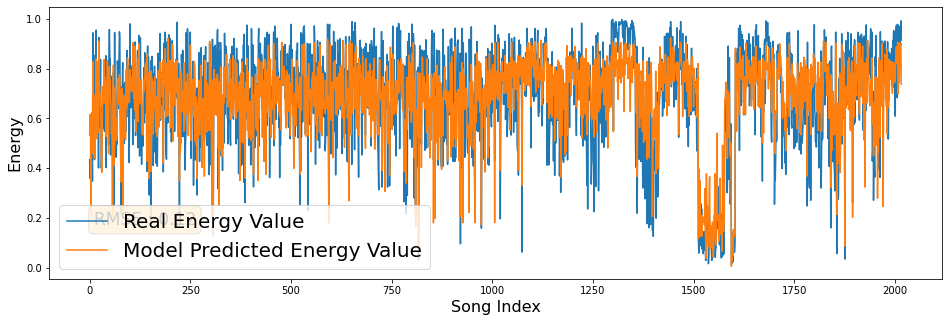

In [927]:
plt.figure(figsize = (16,5))
ax=sns.lineplot(x=np.arange(0,len(y)),y=y,label = 'Real Energy Value')
ax = sns.lineplot(x=np.arange(0,len(y)),y=pred,label = 'Model Predicted Energy Value')
ax.set_xlabel('Song Index',fontsize=16)
ax.set_ylabel('Energy',fontsize=16)
prop3 = dict(boxstyle='round',facecolor='orange',alpha=0.5)
ax.text(0.05, 0.25, 'RMSE : {:.2f}'.format(rmse), transform=ax.transAxes, fontsize=17,
        verticalalignment='top', bbox=prop3)
plt.legend(prop={'size':'20'})

In [928]:

trace1 = go.Scatter(x=np.arange(0,len(y)),y=y,mode='markers',name='Real Values')
trace2 = go.Scatter(x=np.arange(0,len(y)),y=pred,mode='markers',name='Predictions')
data = [trace1,trace2]
layout = dict(title='Prediction vs Real Values',xaxis=dict(title='Sample Number',ticklen=15),yaxis=dict(title='Energy',ticklen=15))
fig = go.Figure(data=data,layout=layout)
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



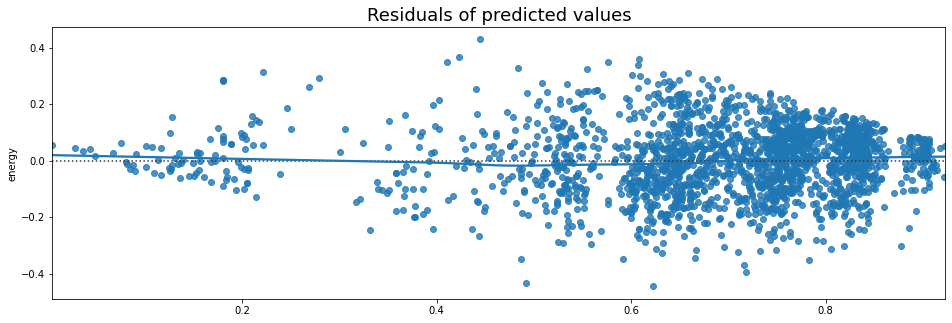

In [929]:
plt.figure(figsize = (16,5))
plt.title('Residuals of predicted values',fontsize=(18))
sns.residplot(pred,y, lowess=True)

# Predicting the loudness levels of each song in the compiled dataset
Model Selection, fitting and prediction.

Let us select a model to predict the energy of a song. As our data set is very small, it is crucial for us to use cross validation to (hopefully) avoiding overfitting.


In [962]:
y = common_df['valence']
my_list = list(common_df)
X=common_df[my_list]
X=X.drop(['valence','key','mode'], axis = 1) 
X

,duration_ms,speechiness,liveness,instrumentalness,energy,time_signature,tempo,acousticness,danceability,loudness
0,204600,0.4310,0.1650,0.021900,0.434,4.0,150.062,0.010200,0.833,-8.795
1,326933,0.0794,0.1370,0.006110,0.359,4.0,160.083,0.199000,0.743,-10.401
2,185707,0.2890,0.1590,0.000234,0.412,4.0,75.044,0.034400,0.838,-7.148
3,199413,0.0261,0.0922,0.510000,0.338,4.0,86.468,0.604000,0.494,-15.236
4,392893,0.0694,0.4390,0.512000,0.561,4.0,174.004,0.180000,0.678,-11.648
...,...,...,...,...,...,...,...,...,...,...
32,342821,0.0648,0.3570,0.000881,0.939,4.0,92.027,0.005910,0.398,-2.865
33,193773,0.0613,0.1380,0.675000,0.858,5.0,104.826,0.000002,0.316,-4.034
34,333813,0.1030,0.2650,0.013800,0.922,4.0,126.937,0.136000,0.355,-7.331
35,255173,0.0784,0.1090,0.231000,0.875,4.0,163.510,0.000007,0.279,-5.787


In [963]:

LR_pipe = Pipeline(steps=[('scaler',StandardScaler()),('poly',PolynomialFeatures(degree=1)),('LinearRegression',LinearRegression())])

LR_scores = -1*cross_val_score(LR_pipe,X,y,cv=5,scoring='neg_mean_squared_error')

print('Linear Regression Cross Validation Average MSE: ',LR_scores.mean())

Linear Regression Cross Validation Average MSE:  0.043978593860595716


In [964]:
LR_pipe.fit(X,y)
pred = LR_pipe.predict(X)
mse = mean_squared_error(pred,y)
print('Linear Regression Fitted Using All The Data MSE: ',mse )

Linear Regression Fitted Using All The Data MSE:  0.04172562407250237


In [965]:
tr = go.Scatter(x = np.arange(1,len(LR_scores)+1),y=LR_scores,mode='lines')
fig = go.Figure(data=[tr],layout={'title':'Linear Regression Fold MSE Scores','xaxis_title':'Fold Number','yaxis_title':'MSE'})
fig.show()

In [966]:
DT_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',DecisionTreeRegressor(max_leaf_nodes=10))])
DT_scores = -1*cross_val_score(DT_Pipe,X,y,cv=5,scoring='neg_mean_squared_error')
DT_Pipe.fit(X,y)
print('Decision Tree MSE: ',DT_scores.mean())

Decision Tree MSE:  0.05054285199157009


In [967]:
tr = go.Scatter(x = np.arange(1,len(DT_scores)+1),y=DT_scores,mode='lines')
fig = go.Figure(data=[tr],layout={'title':'Decision Tree Fold MSE Scores','xaxis_title':'Fold Number','yaxis_title':'MSE'})
fig.show()

In [968]:
RF_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',RandomForestRegressor(max_leaf_nodes=14,n_estimators=20,random_state=42))])
RF_scores = -1*cross_val_score(RF_Pipe,X,y,cv=5,scoring='neg_mean_squared_error')
RF_Pipe.fit(X,y)
print('RandomForest MSE: ',RF_scores.mean())

RandomForest MSE:  0.04574011268521353


In [969]:
tr = go.Scatter(x = np.arange(1,len(RF_scores)+1),y=RF_scores,mode='lines')
fig = go.Figure(data=[tr],layout={'title':'Random Forest Fold MSE Scores','xaxis_title':'Fold Number','yaxis_title':'MSE'})
fig.show()

In [970]:
Knn_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',KNeighborsRegressor(n_neighbors=5))])
Knn_scores = -1*cross_val_score(Knn_Pipe,X,y,cv=5,scoring='neg_mean_squared_error')
Knn_Pipe.fit(X,y)
print('Knn MSE: ',Knn_scores.mean())

Knn MSE:  0.05074538270937131


In [971]:
tr = go.Scatter(x = np.arange(1,len(Knn_scores)+1),y=Knn_scores,mode='lines')
fig = go.Figure(data=[tr],layout={'title':'KNN Fold MSE Scores','xaxis_title':'Fold Number','yaxis_title':'MSE'})
fig.show()

In [972]:
pred = LR_pipe.predict(X)*0.2 + RF_Pipe.predict(X)*0.3 + 0.4* DT_Pipe.predict(X) + Knn_Pipe.predict(X)*0.1
rmse = RMSE(pred,y)

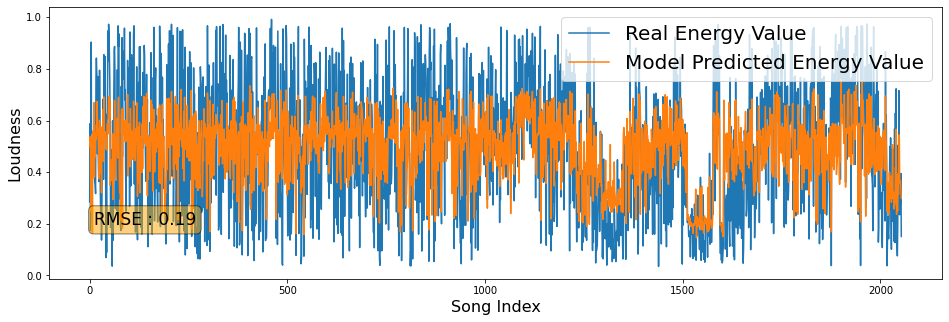

In [973]:
plt.figure(figsize = (16,5))
ax=sns.lineplot(x=np.arange(0,len(y)),y=y,label = 'Real Energy Value')
ax = sns.lineplot(x=np.arange(0,len(y)),y=pred,label = 'Model Predicted Energy Value')
ax.set_xlabel('Song Index',fontsize=16)
ax.set_ylabel('Loudness',fontsize=16)
prop3 = dict(boxstyle='round',facecolor='orange',alpha=0.5)
ax.text(0.05, 0.25, 'RMSE : {:.2f}'.format(rmse), transform=ax.transAxes, fontsize=17,
        verticalalignment='top', bbox=prop3)
plt.legend(prop={'size':'20'})

In [974]:

trace1 = go.Scatter(x=np.arange(0,len(y)),y=y,mode='markers',name='Real Values')
trace2 = go.Scatter(x=np.arange(0,len(y)),y=pred,mode='markers',name='Predictions')
data = [trace1,trace2]
layout = dict(title='Prediction vs Real Values',xaxis=dict(title='Sample Number',ticklen=15),yaxis=dict(title='Loudness',ticklen=15))
fig = go.Figure(data=data,layout=layout)
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



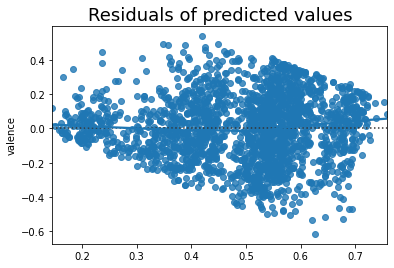

In [975]:
plt.title('Residuals of predicted values',fontsize=(18))
sns.residplot(pred,y, lowess=True)

In [976]:
co_var=common_df.cov()

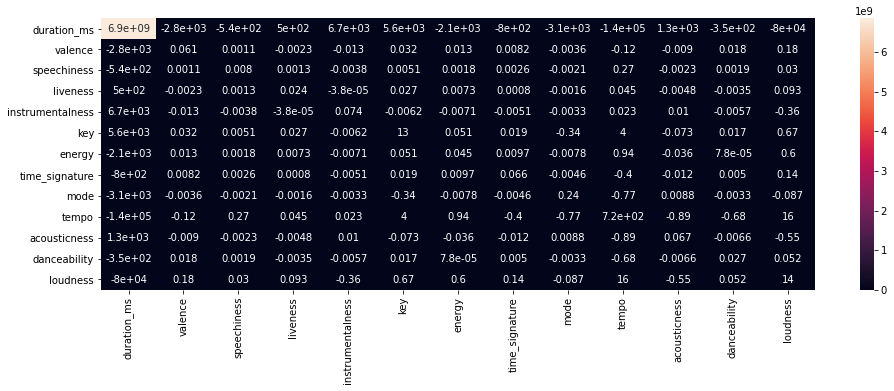

In [977]:
plt.figure(figsize = (16,5))
sns.heatmap(co_var, annot=True)


# Test


In [978]:
y = common_df['acousticness']
my_list = list(common_df)
X=common_df[my_list]
X=X.drop(['acousticness','key','mode'], axis = 1) 
X

,duration_ms,valence,speechiness,liveness,instrumentalness,energy,time_signature,tempo,danceability,loudness
0,204600,0.286,0.4310,0.1650,0.021900,0.434,4.0,150.062,0.833,-8.795
1,326933,0.588,0.0794,0.1370,0.006110,0.359,4.0,160.083,0.743,-10.401
2,185707,0.173,0.2890,0.1590,0.000234,0.412,4.0,75.044,0.838,-7.148
3,199413,0.230,0.0261,0.0922,0.510000,0.338,4.0,86.468,0.494,-15.236
4,392893,0.904,0.0694,0.4390,0.512000,0.561,4.0,174.004,0.678,-11.648
...,...,...,...,...,...,...,...,...,...,...
32,342821,0.235,0.0648,0.3570,0.000881,0.939,4.0,92.027,0.398,-2.865
33,193773,0.306,0.0613,0.1380,0.675000,0.858,5.0,104.826,0.316,-4.034
34,333813,0.276,0.1030,0.2650,0.013800,0.922,4.0,126.937,0.355,-7.331
35,255173,0.395,0.0784,0.1090,0.231000,0.875,4.0,163.510,0.279,-5.787


In [979]:

LR_pipe = Pipeline(steps=[('scaler',StandardScaler()),('poly',PolynomialFeatures(degree=1)),('LinearRegression',LinearRegression())])

LR_scores = -1*cross_val_score(LR_pipe,X,y,cv=5,scoring='neg_mean_squared_error')

print('Linear Regression Cross Validation Average MSE: ',LR_scores.mean())

Linear Regression Cross Validation Average MSE:  0.04074838478901428


In [980]:
LR_pipe.fit(X,y)
pred = LR_pipe.predict(X)
mse = mean_squared_error(pred,y)
print('Linear Regression Fitted Using All The Data MSE: ',mse )

Linear Regression Fitted Using All The Data MSE:  0.035317803073236745


In [981]:
tr = go.Scatter(x = np.arange(1,len(LR_scores)+1),y=LR_scores,mode='lines')
fig = go.Figure(data=[tr],layout={'title':'Linear Regression Fold MSE Scores','xaxis_title':'Fold Number','yaxis_title':'MSE'})
fig.show()

In [982]:
DT_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',DecisionTreeRegressor(max_leaf_nodes=10))])
DT_scores = -1*cross_val_score(DT_Pipe,X,y,cv=5,scoring='neg_mean_squared_error')
DT_Pipe.fit(X,y)
print('Decision Tree MSE: ',DT_scores.mean())

Decision Tree MSE:  0.03896923259757497


In [983]:
tr = go.Scatter(x = np.arange(1,len(DT_scores)+1),y=DT_scores,mode='lines')
fig = go.Figure(data=[tr],layout={'title':'Decision Tree Fold MSE Scores','xaxis_title':'Fold Number','yaxis_title':'MSE'})
fig.show()

In [984]:
RF_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',RandomForestRegressor(max_leaf_nodes=14,n_estimators=20,random_state=42))])
RF_scores = -1*cross_val_score(RF_Pipe,X,y,cv=5,scoring='neg_mean_squared_error')
RF_Pipe.fit(X,y)
print('RandomForest MSE: ',RF_scores.mean())

RandomForest MSE:  0.033935659546992535


In [985]:
tr = go.Scatter(x = np.arange(1,len(RF_scores)+1),y=RF_scores,mode='lines')
fig = go.Figure(data=[tr],layout={'title':'Random Forest Fold MSE Scores','xaxis_title':'Fold Number','yaxis_title':'MSE'})
fig.show()

In [986]:
Knn_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',KNeighborsRegressor(n_neighbors=5))])
Knn_scores = -1*cross_val_score(Knn_Pipe,X,y,cv=5,scoring='neg_mean_squared_error')
Knn_Pipe.fit(X,y)
print('Knn MSE: ',Knn_scores.mean())

Knn MSE:  0.03961805155108653


In [987]:
tr = go.Scatter(x = np.arange(1,len(Knn_scores)+1),y=Knn_scores,mode='lines')
fig = go.Figure(data=[tr],layout={'title':'KNN Fold MSE Scores','xaxis_title':'Fold Number','yaxis_title':'MSE'})
fig.show()

In [988]:
pred = LR_pipe.predict(X)*0.2 + RF_Pipe.predict(X)*0.3 + 0.4* DT_Pipe.predict(X) + Knn_Pipe.predict(X)*0.1
rmse = RMSE(pred,y)

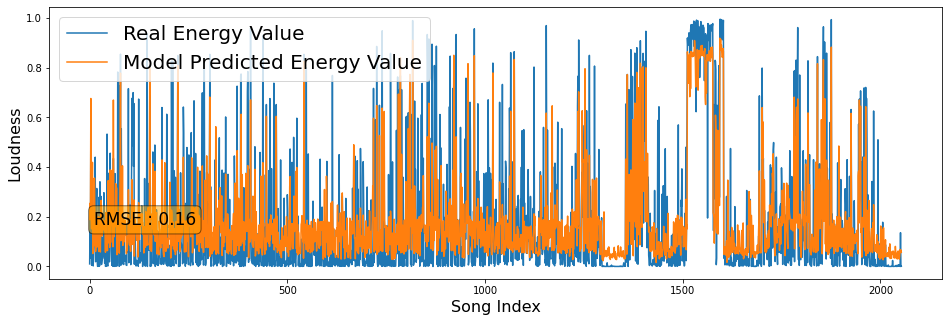

In [989]:
plt.figure(figsize = (16,5))
ax=sns.lineplot(x=np.arange(0,len(y)),y=y,label = 'Real Energy Value')
ax = sns.lineplot(x=np.arange(0,len(y)),y=pred,label = 'Model Predicted Energy Value')
ax.set_xlabel('Song Index',fontsize=16)
ax.set_ylabel('Loudness',fontsize=16)
prop3 = dict(boxstyle='round',facecolor='orange',alpha=0.5)
ax.text(0.05, 0.25, 'RMSE : {:.2f}'.format(rmse), transform=ax.transAxes, fontsize=17,
        verticalalignment='top', bbox=prop3)
plt.legend(prop={'size':'20'})

In [990]:

trace1 = go.Scatter(x=np.arange(0,len(y)),y=y,mode='markers',name='Real Values')
trace2 = go.Scatter(x=np.arange(0,len(y)),y=pred,mode='markers',name='Predictions')
data = [trace1,trace2]
layout = dict(title='Prediction vs Real Values',xaxis=dict(title='Sample Number',ticklen=15),yaxis=dict(title='Loudness',ticklen=15))
fig = go.Figure(data=data,layout=layout)
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



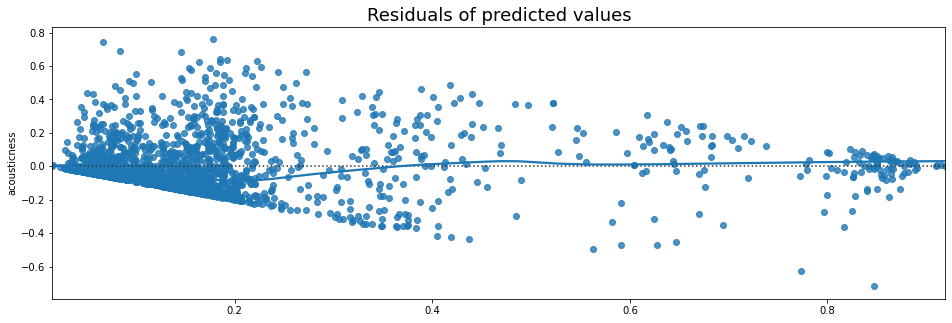

In [991]:
plt.figure(figsize = (16,5))
plt.title('Residuals of predicted values',fontsize=(18))
sns.residplot(pred,y, lowess=True)

In [992]:
co_var=common_df.cov()

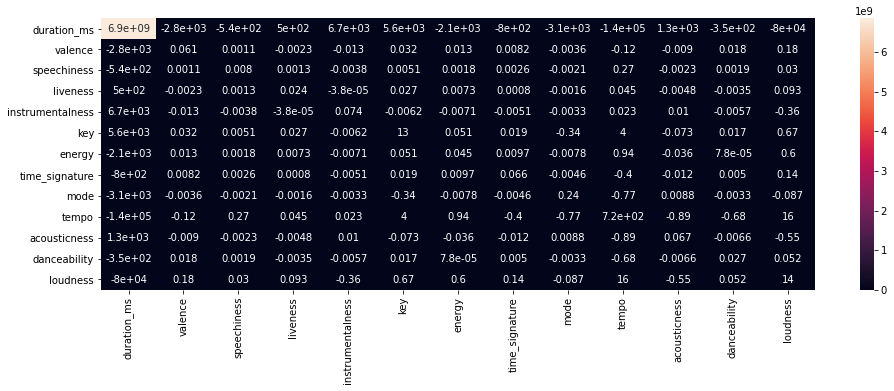

In [993]:
plt.figure(figsize = (16,5))
sns.heatmap(co_var, annot=True)
